* sklearnデータセットに収録された糖尿病患者の検査結果のデータセットで回帰モデルを学習

In [1]:
# 回帰モデル学習用のライブラリのインポート
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [2]:
# sklearnデータセットに収録された糖尿病患者の検査結果のデータセットをロード
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

# 学習用データのデータフレームを作成
x = pd.DataFrame(diabetes_data["data"],columns=diabetes_data["feature_names"])
y = pd.DataFrame(diabetes_data["target"],columns=["target"])

# データフレームの形状と説明変数の列名を表示
print('feature shape:', x.shape, diabetes_data["feature_names"])
print('target shape:', y.shape)

feature shape: (442, 10) ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
target shape: (442, 1)


* データの内容
  * https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
  * 10の検査結果(説明変数)と、1年後の病気の進行状況(応答変数)
* feature data
  * age : age in years
  * sex
  * bmi : body mass index
  * bp : average blood pressure
  * s1 : tc, total serum cholesterol (総血清コレステロール)
  * s2 : ldl, low-density lipoproteins (LDLコレステロール)
  * s3 : hdl, high-density lipoproteins (HDLコレステロール)
  * s4 : tch, total cholesterol / HDL (総コレステロール)
  * s5 : ltg, possibly log of serum triglycerides level (中性脂肪)
  * s6 : glu, blood sugar level (血糖値)
* target data
  * a quantitative measure of disease progression one year after baseline.

In [3]:
## 欠損値の確認 (pandasのisnull関数を利用)
# any(axis=0) で各列に欠損値があるかを確認
print(x.isnull().any(axis=0))
print(y.isnull().any(axis=0))

age    False
sex    False
bmi    False
bp     False
s1     False
s2     False
s3     False
s4     False
s5     False
s6     False
dtype: bool
target    False
dtype: bool


In [4]:
# データを学習用と検証用に分割 (test_sizeで検証データの比率を指定(0.0-1.0の間), random_stateは乱数シード)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(len(x_train), len(x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

331 111 331 111


In [13]:
# 回帰モデルを作成
model = LinearRegression()

# 回帰モデルを学習用データで学習
model.fit(x_train, y_train)

## 検証用データを利用してモデルを評価
# 学習したモデルを使い、検証用データから応答変数を予測
pred = model.predict(x_test)

# 平均絶対誤差、平均二乗誤差、決定係数を計算
print('平均絶対誤差', mean_absolute_error(y_pred=pred, y_true=y_test))
print('平均二乗誤差', mean_squared_error(y_pred=pred, y_true=y_test))
print('二乗平均平方根誤差', math.sqrt(mean_squared_error(y_pred=pred, y_true=y_test)))
print('決定係数', model.score(x_test, y_test))
print('(参考) 学習データに対する決定係数', model.score(x_train, y_train))

平均絶対誤差 41.982981359413145
平均二乗誤差 2903.126734016661
二乗平均平方根誤差 53.88067124690134
決定係数 0.4439690125828357
(参考) 学習データに対する決定係数 0.5359163748137687


In [6]:
# 学習データ(説明変数と応答変数)の相関行列を確認
train = pd.concat([x_train, y_train],axis=1,sort=False)
train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.174360,0.221518,0.342099,0.277576,0.227806,-0.099113,0.227063,0.313549,0.277639,0.213037
sex,0.174360,1.000000,0.081497,0.250335,0.011992,0.104884,-0.375805,0.319623,0.156438,0.212960,0.041472
bmi,0.221518,0.081497,1.000000,0.418432,0.225400,0.219145,-0.385102,0.410414,0.480581,0.409069,0.623540
bp,0.342099,0.250335,0.418432,1.000000,0.238525,0.183710,-0.191106,0.264171,0.387433,0.383693,0.443265
s1,0.277576,0.011992,0.225400,0.238525,1.000000,0.902291,0.078746,0.536737,0.513492,0.300485,0.204173
s2,0.227806,0.104884,0.219145,0.183710,0.902291,1.000000,-0.135291,0.631944,0.315213,0.256151,0.157187
s3,-0.099113,-0.375805,-0.385102,-0.191106,0.078746,-0.135291,1.000000,-0.727541,-0.422533,-0.289087,-0.412521
s4,0.227063,0.319623,0.410414,0.264171,0.536737,0.631944,-0.727541,1.000000,0.642164,0.418111,0.439757
s5,0.313549,0.156438,0.480581,0.387433,0.513492,0.315213,-0.422533,0.642164,1.000000,0.481445,0.570946
s6,0.277639,0.212960,0.409069,0.383693,0.300485,0.256151,-0.289087,0.418111,0.481445,1.000000,0.390243


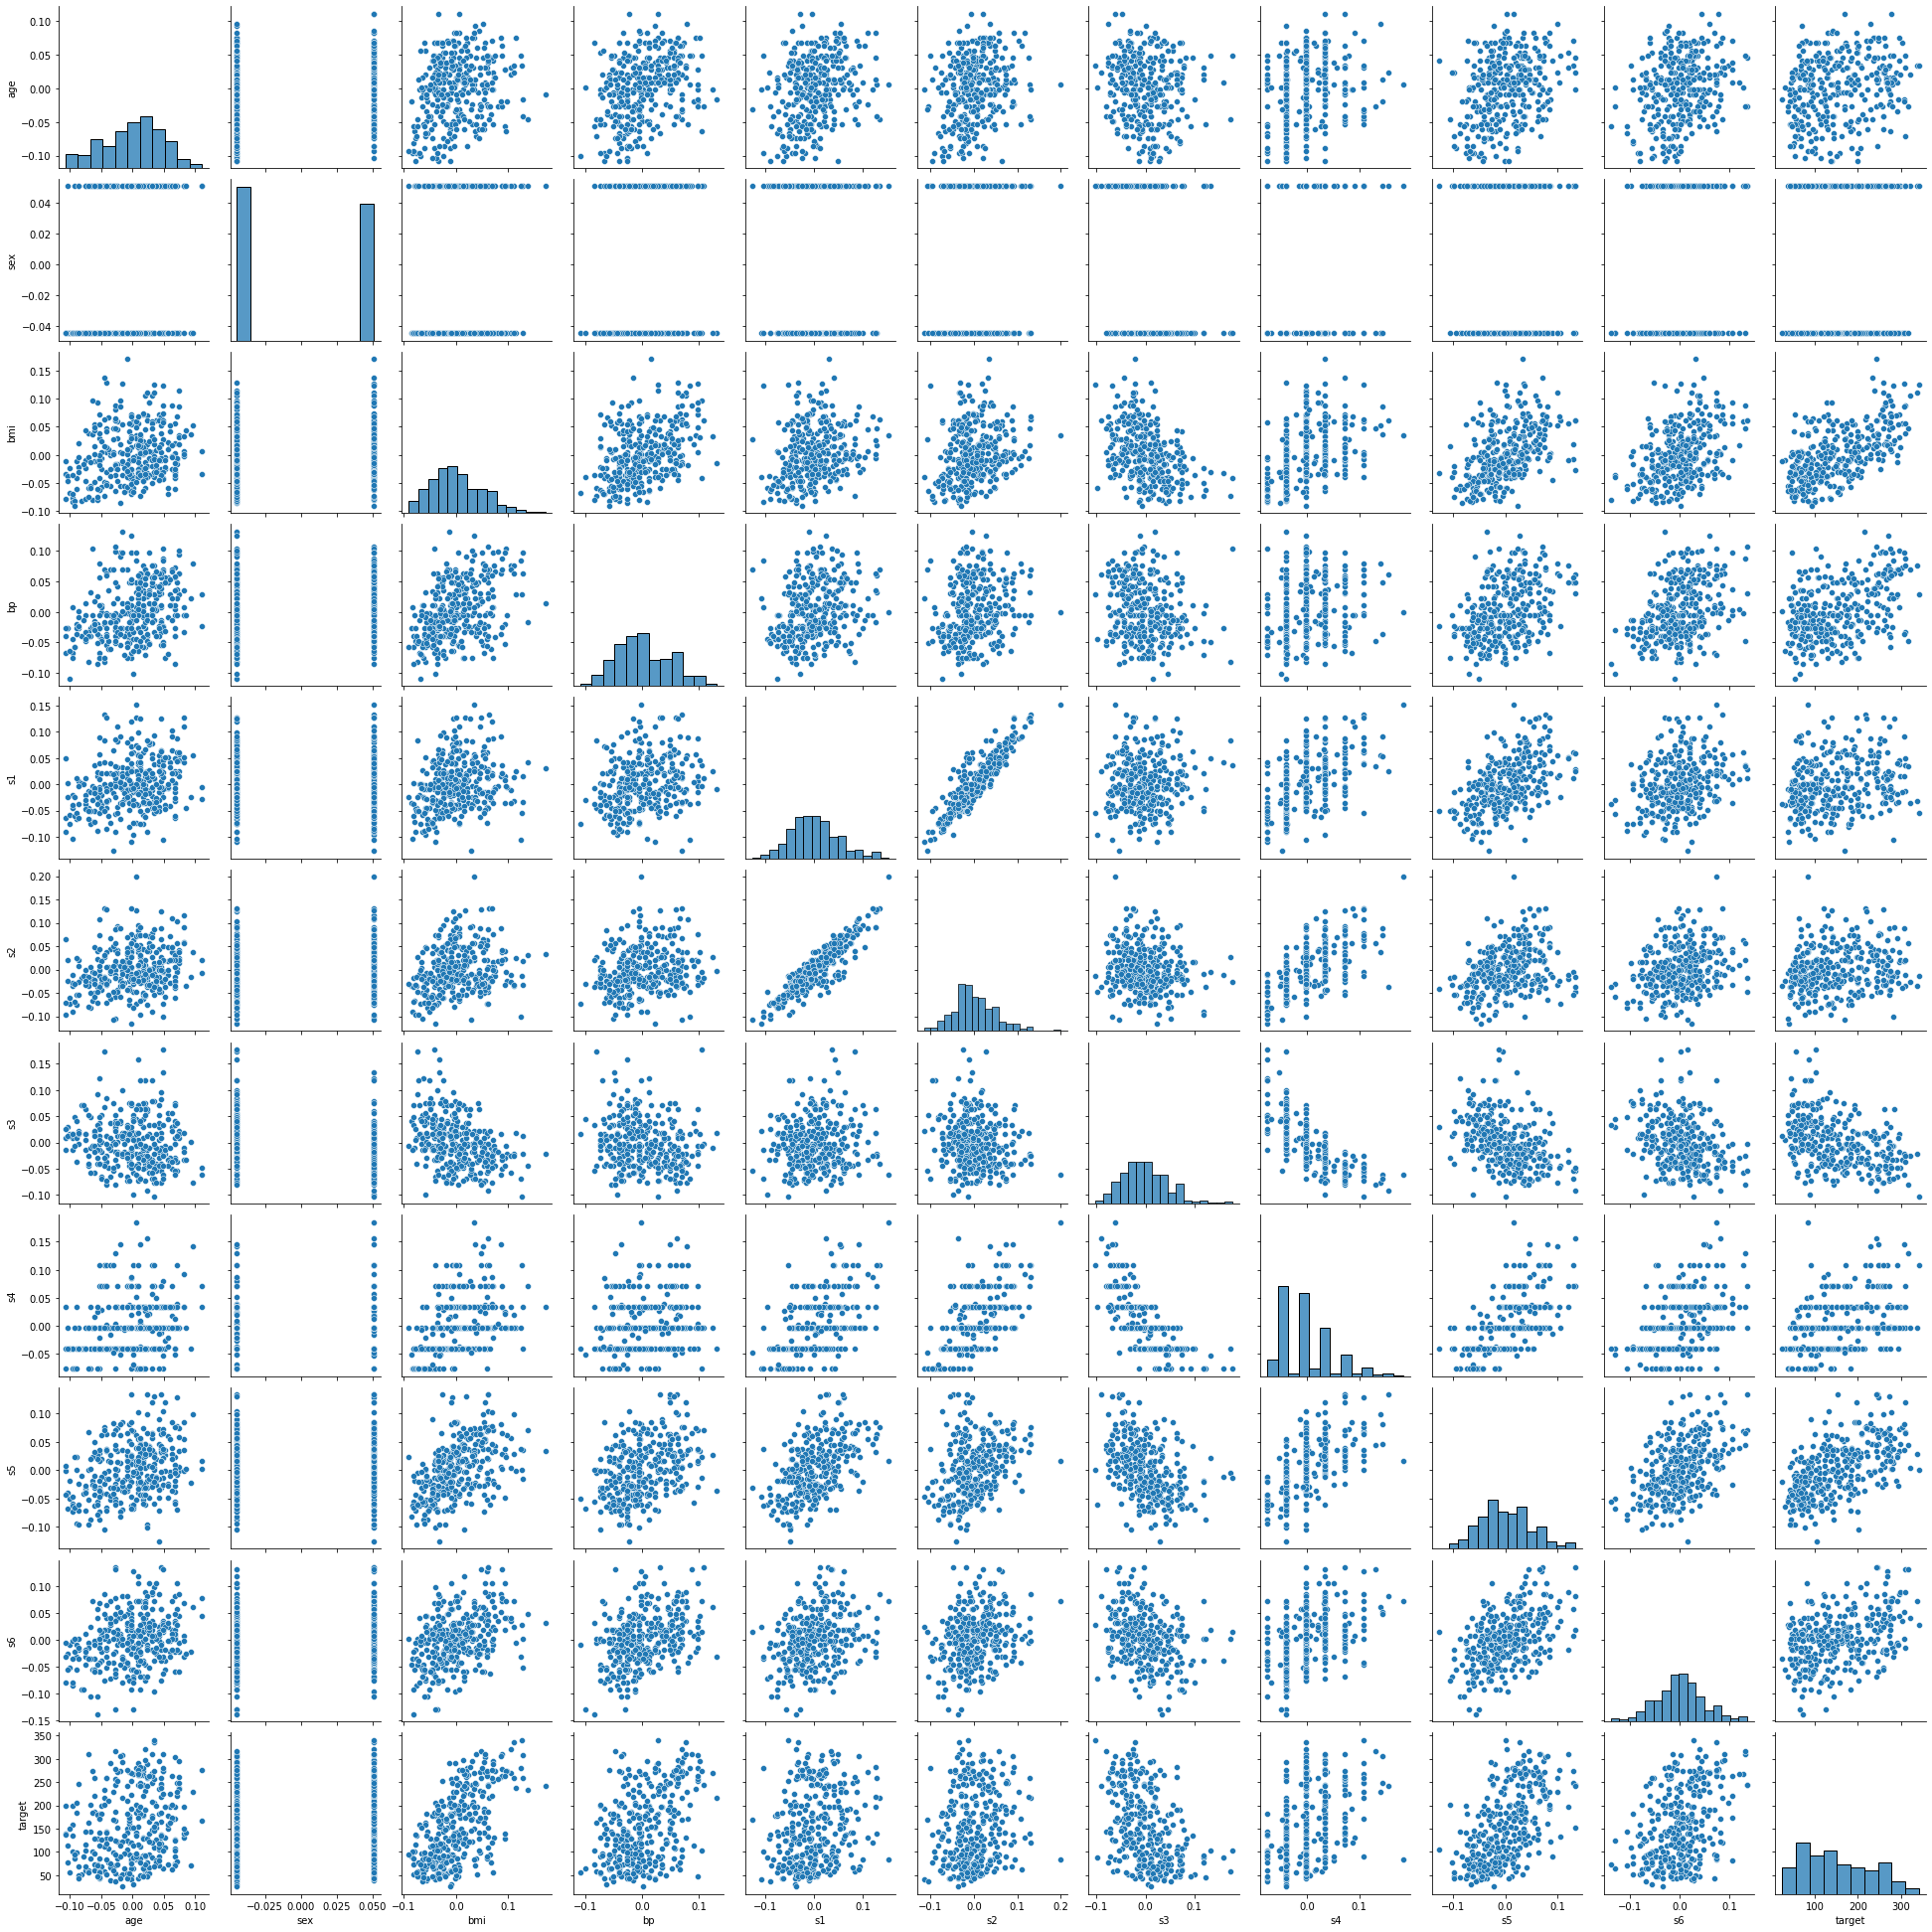

In [7]:
import seaborn as sns
# 学習用データのペアプロットを表示
sns.pairplot(train)
plt.show()

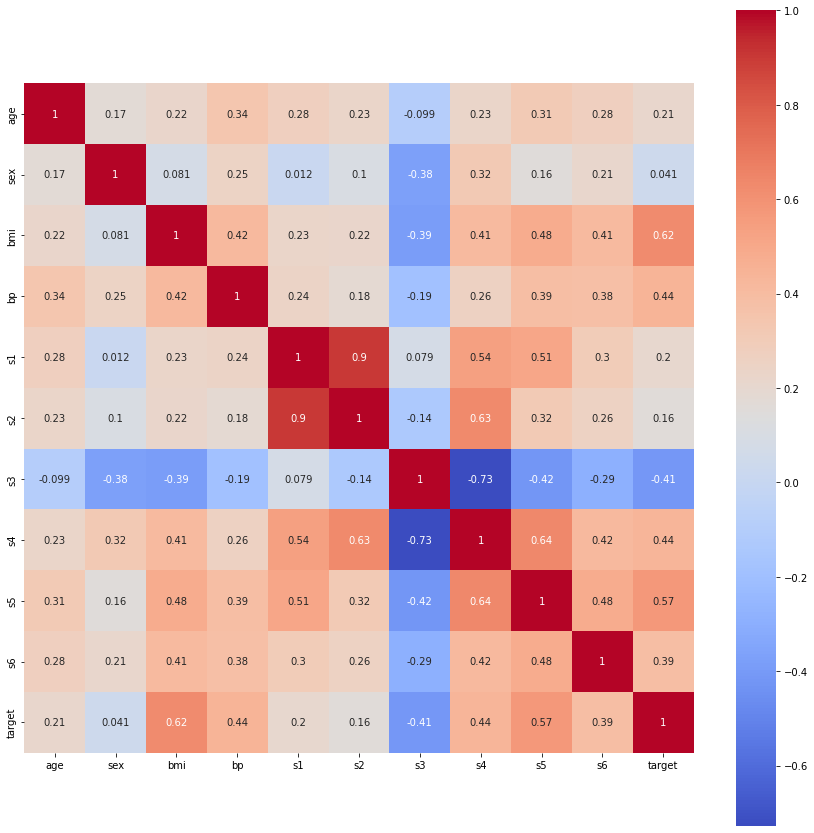

In [8]:
# 学習用データのヒートマップを表示
plt.rcParams['figure.figsize'] = (15.0, 15.0)
sns.heatmap(train.corr(), square=True, annot=True, cmap='coolwarm')
plt.show()

In [9]:
# 独立変数間の分散拡大要因を確認 (データサイエンス基礎 配布資料(第8回) 参照)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

sm_model = sm.OLS(y_train, x_train)
result = sm_model.fit()
# print (result.summary())
num_cols = sm_model.exog.shape[1] # 説明変数の列数
vifs = [vif(sm_model.exog, i) for i in range(0, num_cols)]
print(pd.DataFrame(vifs, index=sm_model.exog_names, columns=['VIF']))

           VIF
age   1.231054
sex   1.286853
bmi   1.601432
bp    1.470618
s1   58.573170
s2   36.357416
s3   15.007986
s4    9.080014
s5   10.447685
s6    1.483434


In [10]:
# sklearn の RFECV を使って変数を選択する
# RFECV : クロスバリデーションを行いながら説明変数の除外を実施
from sklearn.feature_selection import RFECV
import sklearn
rfecv = RFECV(estimator=LinearRegression(), cv=10, scoring="r2")
rfecv.fit(x_train.values, y_train)

# 選択された説明変数
print('all: ', x_train.columns.values)
print('selected:', x_train.columns[rfecv.support_].values)

# 選択された説明変数のデータフレームを作成
x_train_mod = x_train[x_train.columns[rfecv.support_]]
x_test_mod = x_test[x_test.columns[rfecv.support_]]

all:  ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
selected: ['sex' 'bmi' 'bp' 's1' 's2' 's4' 's5']


In [14]:
# 修正版の回帰モデルを作成
model_mod = LinearRegression()

# 修正版の回帰モデルを変数選択後の学習用データで学習
model_mod.fit(x_train_mod, y_train)

## 検証用データを利用してモデルを評価
# 学習したモデルを使い、検証用データから応答変数を予測
pred = model_mod.predict(x_test_mod)

# 平均絶対誤差、平均二乗誤差、決定係数を計算
print('平均絶対誤差', mean_absolute_error(y_pred=pred, y_true=y_test))
print('平均二乗誤差', mean_squared_error(y_pred=pred, y_true=y_test))
print('二乗平均平方根誤差', math.sqrt(mean_squared_error(y_pred=pred, y_true=y_test)))
print('決定係数', model_mod.score(x_test_mod, y_test))
print('(参考) 学習データに対する決定係数', model_mod.score(x_train_mod, y_train))

# 選択前のモデルの性能
# 平均絶対誤差 41.98292029201772
# 平均二乗誤差 2903.1000013228
# 決定係数 0.443974132650792
# (参考) 学習データに対する決定係数 0.535916157695912

平均絶対誤差 42.13775481555836
平均二乗誤差 2916.640781351183
二乗平均平方根誤差 54.0059328347468
決定係数 0.44138068979438483
(参考) 学習データに対する決定係数 0.5352093174245359


In [12]:
# 独立変数間の分散拡大要因を確認 (データサイエンス基礎 配布資料(第8回) 参照)
sm_model = sm.OLS(y_train, x_train_mod)
result = sm_model.fit()
# print (result.summary())
num_cols = sm_model.exog.shape[1] # 説明変数の列数
vifs = [vif(sm_model.exog, i) for i in range(0, num_cols)]
print(pd.DataFrame(vifs, index=sm_model.exog_names, columns=['VIF']))

           VIF
sex   1.259235
bmi   1.553549
bp    1.378765
s1   15.096565
s2   16.648570
s4    4.783432
s5    5.227782
